C:\Users\sadiq\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.

C:\Users\sadiq\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\sadiq\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.

C:\Users\sadiq\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\sadiq\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarnin

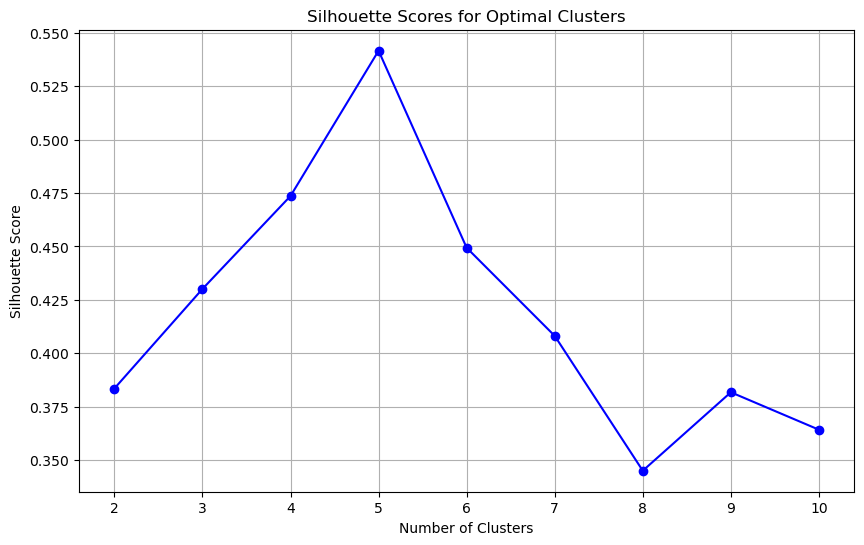

C:\Users\sadiq\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.

C:\Users\sadiq\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\sadiq\AppData\Local\Temp\ipykernel_26364\1357436824.py:66: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\sadiq\AppData\Local\Temp\ipykernel_26364\1357436824.py:67: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior

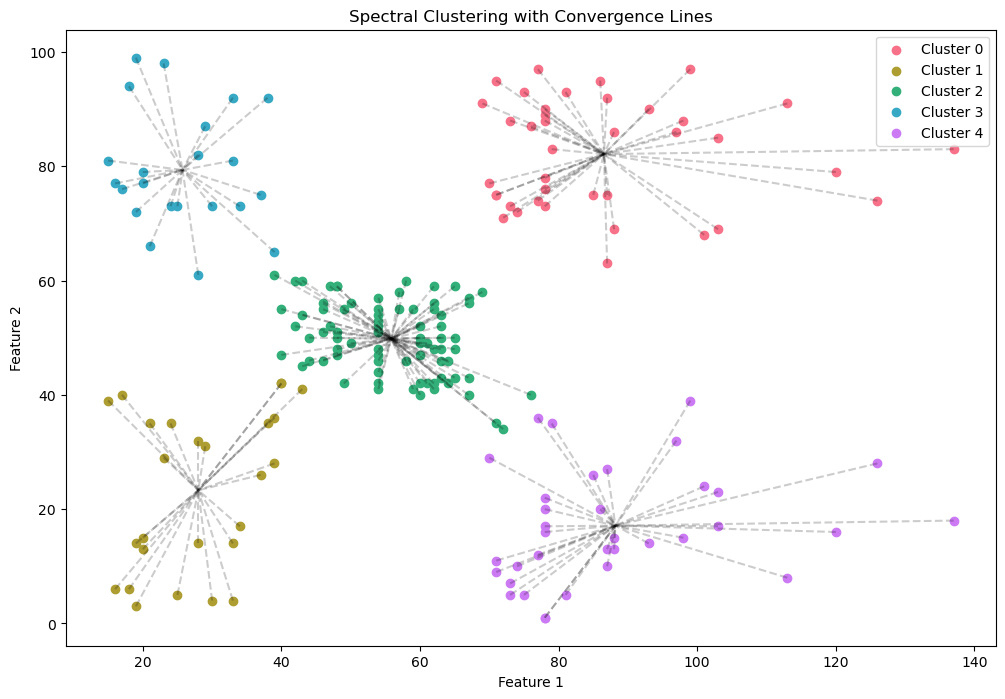

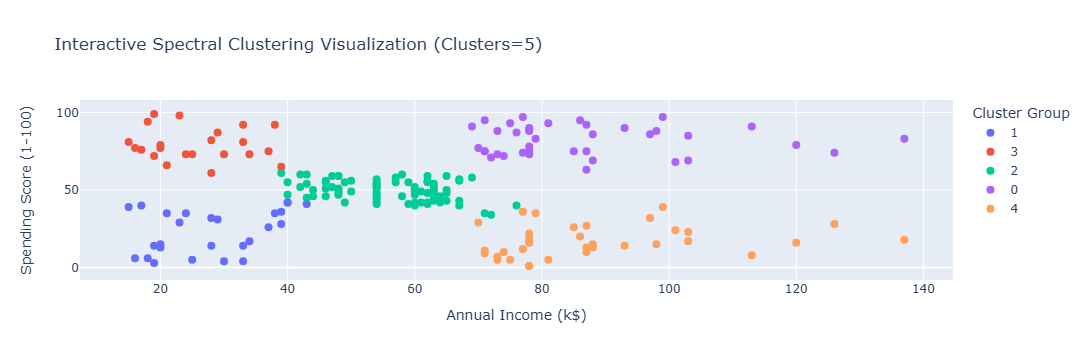

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
import plotly.express as px

# Load dataset
dataset = pd.read_csv("cluster.csv")

# Selecting columns for clustering
datasett = dataset.iloc[:, [3, 4]].copy()

# Function to determine the optimal number of clusters using silhouette scores
def find_optimal_clusters(data, max_clusters=10):
    silhouette_scores = []
    for n_clusters in range(2, max_clusters + 1):
        clustering = SpectralClustering(
            n_clusters=n_clusters,
            affinity='nearest_neighbors',
            random_state=42
        ).fit(data)
        score = silhouette_score(data, clustering.labels_)
        silhouette_scores.append((n_clusters, score))
    return silhouette_scores

# Find silhouette scores and determine the optimal number of clusters
scores = find_optimal_clusters(datasett, max_clusters=10)
optimal_clusters = max(scores, key=lambda x: x[1])[0]

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot([x[0] for x in scores], [x[1] for x in scores], marker='o', color='b')
plt.title("Silhouette Scores for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()

# Apply Spectral Clustering with the optimal number of clusters
clusmodel = SpectralClustering(
    n_clusters=optimal_clusters,
    affinity='nearest_neighbors',
    random_state=42
)
labels = clusmodel.fit_predict(datasett)
datasett['Cluster_group'] = labels

# Plot clusters with convergence lines (Static Plot)
plt.figure(figsize=(12, 8))
palette = sns.color_palette("husl", optimal_clusters)

for cluster in range(optimal_clusters):
    cluster_points = datasett[datasett['Cluster_group'] == cluster]
    plt.scatter(
        cluster_points.iloc[:, 0],
        cluster_points.iloc[:, 1],
        label=f'Cluster {cluster}',
        color=palette[cluster]
    )

    # Calculate the medoid of the cluster and draw convergence lines
    cluster_medoid = cluster_points.iloc[:, :2].mean(axis=0)
    for _, point in cluster_points.iterrows():
        plt.plot([point.iloc[0], cluster_medoid[0]],
                 [point.iloc[1], cluster_medoid[1]], 'k--', alpha=0.2)

plt.title("Spectral Clustering with Convergence Lines")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Interactive Cluster Plot (Using Plotly)
fig = px.scatter(
    datasett,
    x=datasett.columns[0],
    y=datasett.columns[1],
    color=datasett['Cluster_group'].astype(str),
    title=f"Interactive Spectral Clustering Visualization (Clusters={optimal_clusters})",
    labels={'color': 'Cluster Group'}
)
fig.update_traces(marker=dict(size=8))
fig.show()


In [13]:
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [10]:
datasett

,Annual Income (k$),Spending Score (1-100),Cluster_group
0,15,39,2
1,15,81,1
2,16,6,0
3,16,77,1
4,17,40,2
...,...,...,...
195,120,79,9
196,126,28,10
197,126,74,9
198,137,18,10
